# ACP de visages

Nous allons faire une ACP sur des images. On considérera pour cela que nos images sont des vecteurs où chaque pixel est un entier entre 0 et 255 (en niveaux de gris).

## Chargement des données

Le chargement des données MNIST s'effectue facilement grâce aux commandes suivantes. Le site associé est http://vis-www.cs.umass.edu/lfw/

**Attention** : la 1ère fois, la ligne suivante va télécharger 200 méga de données, et créer un dossier `lfw_home`.

On va télécharger les images des personnalités ayant plus de 20 images ([doc de la fonction](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html))

In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(data_home=".", min_faces_per_person=20, resize=0.4)

Quelques variables associées aux images :

In [3]:
images = lfw_people.data #liste d'images
nombre_images, hauteur_image, largeur_image = lfw_people.images.shape

print("nombre images : ", nombre_images)
print("dimension des images : ", hauteur_image, largeur_image)

nombre images :  3023
dimension des images :  50 37


Les personnalités : 

In [4]:
personnalités = lfw_people.target_names

for nom in personnalités:
    print(nom)

Alejandro Toledo
Alvaro Uribe
Amelie Mauresmo
Andre Agassi
Angelina Jolie
Ariel Sharon
Arnold Schwarzenegger
Atal Bihari Vajpayee
Bill Clinton
Carlos Menem
Colin Powell
David Beckham
Donald Rumsfeld
George Robertson
George W Bush
Gerhard Schroeder
Gloria Macapagal Arroyo
Gray Davis
Guillermo Coria
Hamid Karzai
Hans Blix
Hugo Chavez
Igor Ivanov
Jack Straw
Jacques Chirac
Jean Chretien
Jennifer Aniston
Jennifer Capriati
Jennifer Lopez
Jeremy Greenstock
Jiang Zemin
John Ashcroft
John Negroponte
Jose Maria Aznar
Juan Carlos Ferrero
Junichiro Koizumi
Kofi Annan
Laura Bush
Lindsay Davenport
Lleyton Hewitt
Luiz Inacio Lula da Silva
Mahmoud Abbas
Megawati Sukarnoputri
Michael Bloomberg
Naomi Watts
Nestor Kirchner
Paul Bremer
Pete Sampras
Recep Tayyip Erdogan
Ricardo Lagos
Roh Moo-hyun
Rudolph Giuliani
Saddam Hussein
Serena Williams
Silvio Berlusconi
Tiger Woods
Tom Daschle
Tom Ridge
Tony Blair
Vicente Fox
Vladimir Putin
Winona Ryder


In [5]:
personnalités_index = [personnalités[lfw_people.target[index]] for index in range(nombre_images)]

for index in range(nombre_images):
    print("image", index, "nom :", personnalités_index[index])

image 0 nom : Winona Ryder
image 1 nom : Jean Chretien
image 2 nom : Carlos Menem
image 3 nom : Ariel Sharon
image 4 nom : Alvaro Uribe
image 5 nom : Colin Powell
image 6 nom : Recep Tayyip Erdogan
image 7 nom : Gray Davis
image 8 nom : George Robertson
image 9 nom : Silvio Berlusconi
image 10 nom : George W Bush
image 11 nom : George W Bush
image 12 nom : Nestor Kirchner
image 13 nom : Jean Chretien
image 14 nom : Bill Clinton
image 15 nom : George W Bush
image 16 nom : Carlos Menem
image 17 nom : Alvaro Uribe
image 18 nom : George W Bush
image 19 nom : Colin Powell
image 20 nom : Donald Rumsfeld
image 21 nom : George W Bush
image 22 nom : Hugo Chavez
image 23 nom : George W Bush
image 24 nom : George W Bush
image 25 nom : George W Bush
image 26 nom : George W Bush
image 27 nom : Andre Agassi
image 28 nom : Gerhard Schroeder
image 29 nom : Pete Sampras
image 30 nom : Ariel Sharon
image 31 nom : Arnold Schwarzenegger
image 32 nom : Recep Tayyip Erdogan
image 33 nom : Jennifer Capriati


## Regardons les images

Chaque image est une liste de coordonnées. 
Nos donnees sont ainsi des vecteurs de dimension hauteur * largeur. Chaque coordonnée est un niveau de gris.

Regardans l'image d'index 2698

In [6]:
print(images[2698])

[0.07973856 0.07320262 0.14117648 ... 0.32156864 0.44575164 0.31895426]


Pour représenter graphiquement cette ligne, il faut reconstruire l'image en la séparant en ligne :

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.reset_orig() # pour une fois on ne veut pas des paramètres de seaborn
current_palette = sns.color_palette()

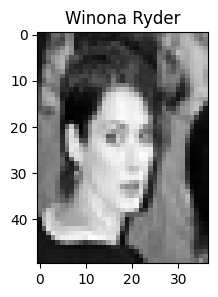

In [8]:
fig, ax = plt.subplots(figsize=(3, 3)) 

plt.imshow(images[2698].reshape((hauteur_image, largeur_image)), 
           cmap=plt.cm.gray)

plt.title(personnalités_index[2698])

plt.show()

**QUESTION** : Trouvez l'index de toutes les photos de winona ryder.

In [9]:
for index in range(nombre_images):
    if personnalités_index[index] == "Winona Ryder":
        print("image", index)

image 0
image 34
image 280
image 299
image 365
image 474
image 484
image 681
image 755
image 778
image 809
image 908
image 1077
image 1317
image 1369
image 1424
image 1477
image 1548
image 1717
image 1758
image 2474
image 2676
image 2698
image 2718


## l'ACP

Centrer et reduire les donnees a normalisé les niveaux de gris pour toutes les images. On est pas obligé de le faire, mais si on ne le fait pas, le calcul des $cos^2$ va être faux, il ne faudra pas en tenir compte.

On utilisera maintenant les données centrées et réduites. Elles sont un peut différentes des images de départ. Regardez commant Winona a été changée.

In [10]:
images

array([[0.00130719, 0.        , 0.        , ..., 0.06666667, 0.07450981,
        0.09803922],
       [0.        , 0.        , 0.        , ..., 0.11633987, 0.09803922,
        0.075817  ],
       [0.        , 0.        , 0.        , ..., 0.05228758, 0.05620915,
        0.07712419],
       ...,
       [0.06013072, 0.08104575, 0.12418301, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05359477, 0.01830065,
        0.00392157],
       [0.00130719, 0.00261438, 0.00130719, ..., 0.20261438, 0.18300654,
        0.14117648]], dtype=float32)

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas

In [12]:
scaler = StandardScaler()

images_scaled = scaler.fit_transform(images)

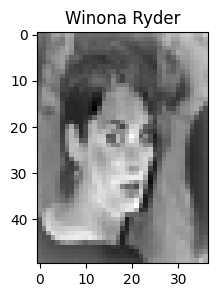

In [13]:
fig, ax = plt.subplots(figsize=(3, 3)) 

plt.imshow(images_scaled[2698].reshape((hauteur_image, largeur_image)), 
           cmap=plt.cm.gray)

plt.title(personnalités_index[2698])

plt.show()

Effectuons une analyse en composantes principale de nos images.

Comme le nombre de dimensions est très importante, nous ne calculerons que les 50 premiers axes. On choisi le nombre d'axe à conserver en utilisant le paramètre `n_components` de la fonction `PCA` de sklearn (voir https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [14]:
import pandas
from sklearn.decomposition import PCA 
import numpy as np

In [15]:
X = pandas.DataFrame(images_scaled)

pca = PCA(n_components=50)
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
I = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C = pandas.DataFrame(X @ U, index=X.index) # nouvelles coordonnées

corrélations = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
cos2 = (C**2).div((X**2).sum(axis=1), axis='index')

**QUESTION** : Affichez l'inertie du nuage

In [16]:
I

,pourcentage
0,0.226523
1,0.079169
2,0.058860
3,0.046072
4,0.045065
5,0.038101
6,0.034083
7,0.019735
8,0.018033
9,0.017579


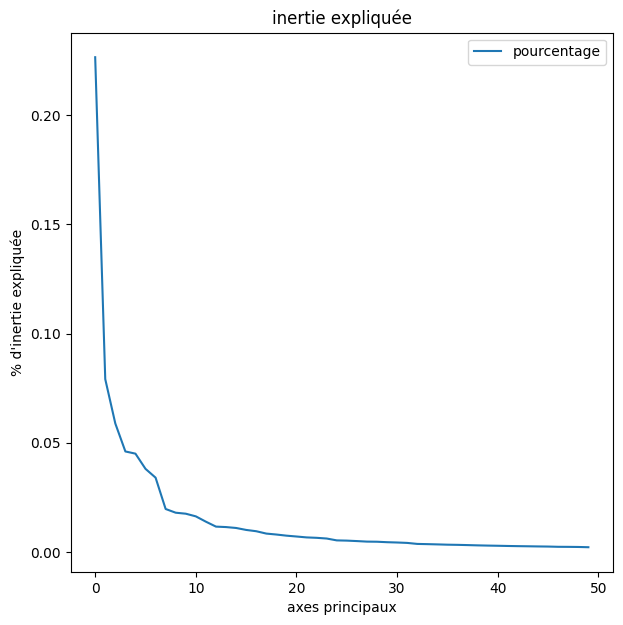

In [17]:
fig, ax = plt.subplots(figsize=(7, 7)) 

I.plot(ax=ax)

plt.title("inertie expliquée")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquée")

plt.show() 


* regarder l'inertie cumulée. Combien d'inertie est conservée sur les 50 permiers axes ?
* combien d'axes avons nous en tout ?
* la qualité de la représentation (l'angle) pour les 50 axes gardés 
* pour les 12 premiers axes

In [18]:
I.cumsum()

,pourcentage
0,0.226523
1,0.305692
2,0.364553
3,0.410624
4,0.455689
5,0.493790
6,0.527873
7,0.547608
8,0.565641
9,0.583221


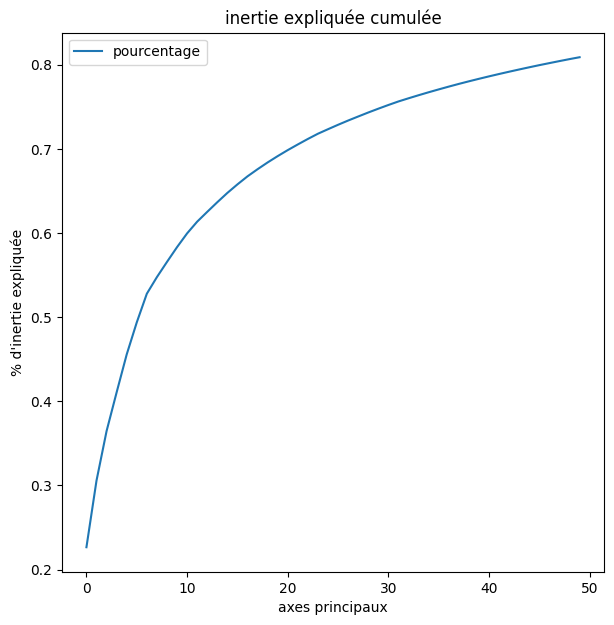

In [19]:
fig, ax = plt.subplots(figsize=(7, 7)) 

I.cumsum().plot(ax=ax)

plt.title("inertie expliquée cumulée")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquée")

plt.show() 

In [20]:
I.sum()

pourcentage    0.809013
dtype: float32

On a conservé 85% de l'inertie pour 50 axes. Il y a `hauteur_image * largeur_image` axes en tout.

Qualité de projection ($cos^2$) :

In [21]:
cos2 # cos^2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.015441,0.001812,0.031544,0.237713,0.000567,0.001209,0.018048,0.015456,0.001821,0.103015,...,0.000449,0.002363,0.005232,0.000949,0.012206,0.000821,0.000510,0.002055,0.000403,0.000461
1,0.496885,0.001326,0.003182,0.000162,0.001484,0.000244,0.111592,0.084874,0.002074,0.006838,...,0.000089,0.000651,0.002512,0.017779,0.000102,0.000433,0.006024,0.001187,0.000779,0.002975
2,0.679781,0.029454,0.092416,0.002957,0.000005,0.001523,0.003597,0.001045,0.000473,0.001487,...,0.000060,0.000288,0.000758,0.000562,0.001000,0.000019,0.000020,0.000654,0.000232,0.003142
3,0.176210,0.128564,0.003819,0.000756,0.008645,0.164057,0.031343,0.004846,0.000006,0.008007,...,0.000156,0.000736,0.000012,0.005458,0.000339,0.000007,0.000923,0.000060,0.004192,0.000011
4,0.394732,0.053184,0.010891,0.012918,0.137756,0.004397,0.019310,0.003199,0.093822,0.000852,...,0.009588,0.001410,0.002392,0.001216,0.000300,0.001299,0.000664,0.000108,0.000599,0.000399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,0.003567,0.168125,0.017563,0.045052,0.017379,0.001873,0.159820,0.001080,0.006526,0.012925,...,0.002014,0.000036,0.001468,0.007119,0.000082,0.000104,0.000069,0.003976,0.000002,0.000290
3019,0.017912,0.059850,0.017668,0.047530,0.034525,0.000404,0.013872,0.040910,0.191188,0.022050,...,0.047658,0.001710,0.006386,0.000084,0.002142,0.001452,0.001911,0.000505,0.001456,0.001065
3020,0.334897,0.025828,0.021605,0.002800,0.045387,0.010404,0.019849,0.008174,0.014065,0.084563,...,0.010848,0.004053,0.007311,0.000529,0.005517,0.000192,0.002599,0.002455,0.000025,0.001027
3021,0.170334,0.000025,0.111408,0.137417,0.009030,0.009700,0.000575,0.029119,0.004010,0.036568,...,0.000065,0.000395,0.001408,0.000136,0.001612,0.001589,0.005359,0.000808,0.001149,0.000456


Qualité de projection (angles) :

In [22]:
#angles 
from math import sqrt, acos, pi

cos2.sum(axis=1).apply(lambda x: acos(sqrt(x)) * 180 / pi).sort_values()

1524     9.739241
1623    11.294094
1303    11.381776
398     11.799921
572     12.337629
          ...    
822     45.032561
214     46.003358
493     48.786224
2704    50.073669
1364    50.214824
Length: 3023, dtype: float64

Les plus proches ont un angle de 9°, les plus éloignées de 45°

In [23]:
cos2.loc[:, :11].sum(axis=1).apply(lambda x: acos(sqrt(x)) * 180 / pi).sort_values()

1524    14.013570
1303    15.148320
1623    16.621965
1937    17.144786
572     18.120989
          ...    
1885    66.472907
1364    66.901026
897     66.986707
2704    69.354666
822     69.738761
Length: 3023, dtype: float64

Les plus proches ont un angle de °12, les plus éloignées de 65°

## On peut regarder les nouveaux axes (eigenfaces)

On a gardé les 50 premiers vecteur propres. Chacun étant un vecteur de dimension  hauteur * largeur :

In [24]:
hauteur_image * largeur_image

1850

Le premier vecteur est une colonne de U. Pour l'obtenir :

In [25]:
U.transpose()[0]

array([0.01719544, 0.01887078, 0.02004974, ..., 0.00679191, 0.00695474,
       0.00739179], dtype=float32)

**QUESTION** : Représentez l'image associée à cet axe

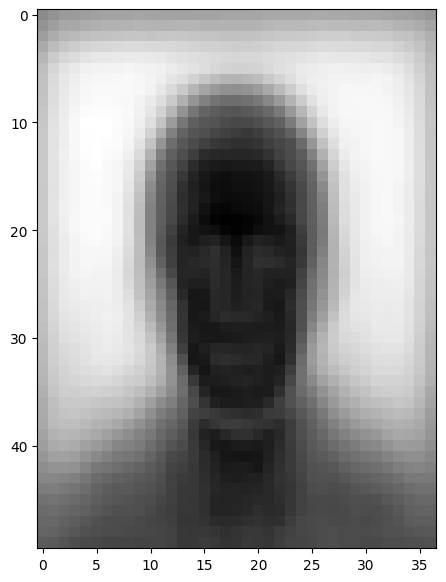

In [26]:
fig, ax = plt.subplots(figsize=(7, 7)) 

plt.imshow(U.transpose()[0].reshape((hauteur_image, largeur_image)), 
           cmap=plt.cm.gray)

plt.show()

**QUESTION** : Représentez les images associées aux 12 premiers axes

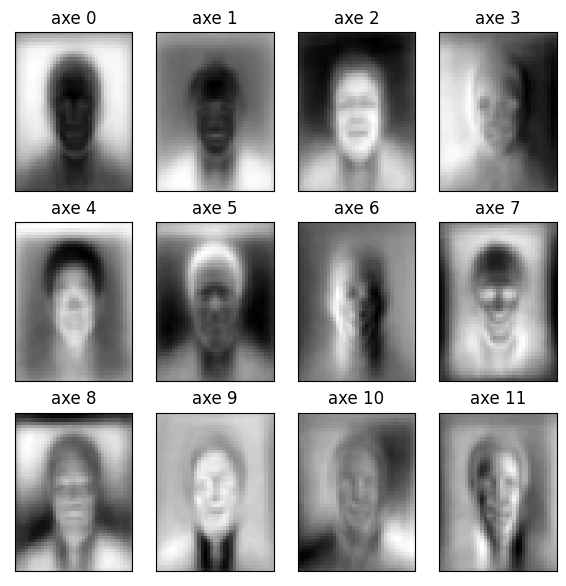

In [27]:
fig, ax = plt.subplots(figsize=(7, 7), nrows=3, ncols=4) 

for i in range(3):
    for j in range(4):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title("axe " + str(i * 4 + j))
        ax[i][j].imshow(U.transpose()[4 * i + j].reshape((hauteur_image, largeur_image)), 
                                  cmap=plt.cm.gray)

plt.show()

## Les images approximées

On peu reconstruire les images en n'utilisant que les axes considérés. Nous en avons pris 50 sur les hauteur * largeur possibles.

In [28]:
images_scaled

array([[-0.55067575, -0.6151551 , -0.65207493, ..., -0.53716755,
        -0.44773105, -0.23511924],
       [-0.55638224, -0.6151551 , -0.65207493, ..., -0.32017204,
        -0.34254155, -0.33777082],
       [-0.55638224, -0.6151551 , -0.65207493, ..., -0.5999821 ,
        -0.5295451 , -0.33173248],
       ...,
       [-0.29388264, -0.28372267, -0.16557081, ..., -0.8283984 ,
        -0.7808312 , -0.68799376],
       [-0.55638224, -0.6151551 , -0.65207493, ..., -0.59427166,
        -0.6990171 , -0.6698788 ],
       [-0.55067575, -0.60446376, -0.6469538 , ...,  0.05671495,
         0.03730947, -0.03585443]], dtype=float32)

Pour ne conserver que les 50 premiers axes, on pourrait faire le calcul en reprojetant nos nouvelles coordonnées sur l'ancien repère, mais la sklearn nous permet de le faire tout seul.

**QUESTION** : Quelle est la qualité de représentation ($cos^2$ et angle) de l'image 2698 ?

In [29]:
#cos^2

cos2.sum(axis=1)[2698]

0.7275154

In [30]:
#angle

acos(sqrt(cos2.sum(axis=1)[2698]))

0.5491947629695434

Winona dans le nouveau repère des 50 premiers axes factoriels :

In [31]:
C.iloc[2698]

0     -7.479180
1     -0.090732
2     11.023787
3      3.935707
4      9.338663
5     -3.892543
6      5.471935
7      3.159844
8     -0.319052
9     10.622466
10    -1.685406
11    -0.306050
12     3.151557
13    -2.547410
14    -0.386563
15    -6.899898
16     2.520679
17     1.813151
18    -6.696064
19     0.326795
20    -7.788619
21     0.627965
22    -2.749080
23    -0.761144
24    -2.074882
25    -0.634625
26   -11.015219
27    -4.105147
28    -1.914042
29     0.652017
30    -1.900589
31     1.077260
32    -3.177949
33     0.213816
34    -5.017919
35     2.224662
36     1.524593
37     3.413732
38    -1.491183
39     0.010995
40     3.544215
41    -1.935555
42    -2.438944
43     1.692034
44    -1.847880
45     2.167028
46    -1.840852
47    -0.354909
48    -1.960156
49     0.913755
Name: 2698, dtype: float32

Dans le repère originel :

In [32]:
image_reconstruite = pca.inverse_transform(C.iloc[2698])

image_reconstruite

array([-0.07067756, -0.0319103 , -0.01289818, ...,  0.17982167,
        0.09655689,  0.01425097], dtype=float32)

**QUESTION** : représentez l'image reconstruite. Mettez côte à côte l'image originelle, l'image centrée réduite et l'image sur les 50 premiers axes factoriels.

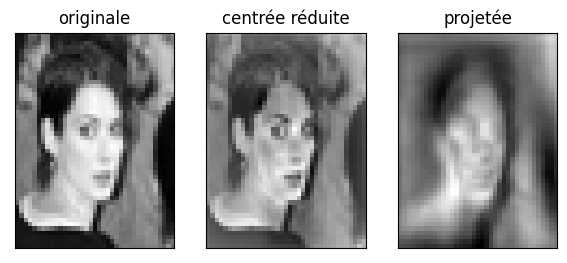

In [33]:
fig, ax = plt.subplots(figsize=(7, 7), nrows=1, ncols=3) 

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("originale")
ax[0].imshow(images[2698].reshape((hauteur_image, largeur_image)), 
             cmap=plt.cm.gray)

ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("centrée réduite")
ax[1].imshow(images_scaled[2698].reshape((hauteur_image, largeur_image)), 
             cmap=plt.cm.gray)

ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("projetée")
ax[2].imshow(image_reconstruite.reshape((hauteur_image, largeur_image)), 
             cmap=plt.cm.gray)


plt.show()

## Nombre d'axes utilisés

On ne va pas centrer/reduire les données et voir l'évolution d'une image lorsque l'on ajoute des axes.

Pour cela, commançons par faire une ACP sur 200 composantes (attention, ça va prendre du temps) :

In [34]:
X_img = pandas.DataFrame(images)

pca = PCA(n_components=200)
pca.fit(X_img)

U_img = np.transpose(pca.components_) # vecteurs propres
I_img = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C_img = pandas.DataFrame(X_img @ U_img, index=X.index) # nouvelles coordonnées

corrélations_img = pandas.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
cos2_img = (C**2).div((X**2).sum(axis=1), axis='index')

Les coordonnées d'une image selon les nouveaux axes dont données par `C_img` et les coordonnées des nouveaux axes dans l'ancien repère est donnée par `U_img`.

Les coodonnées de l'image 2698 dans le repère original est alors, pour les 200 axes :

In [35]:
np.matmul(U_img, C_img.loc[2698])

array([0.02137815, 0.11296964, 0.1983224 , ..., 0.32482567, 0.3122864 ,
       0.27049854], dtype=float32)

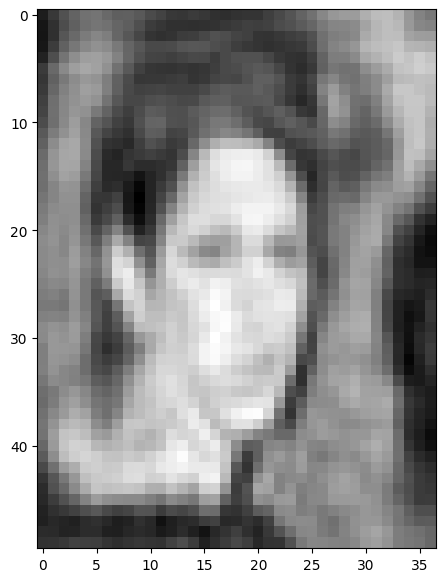

In [36]:
img = np.matmul(U_img, C_img.loc[2698])

fig, ax = plt.subplots(figsize=(7, 7)) 

ax.imshow(img.reshape((hauteur_image, largeur_image)), 
             cmap=plt.cm.gray)
plt.show()

Et pour les 50 premiers axes : 

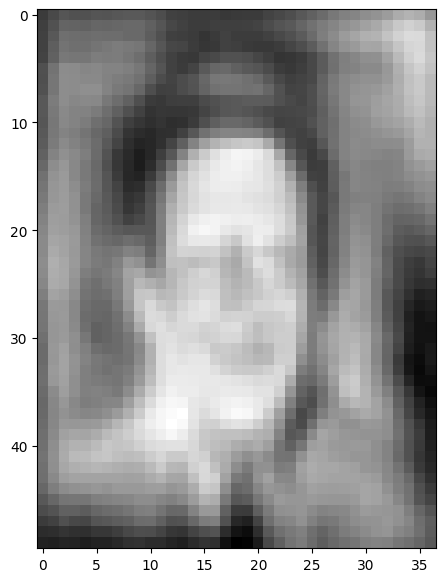

In [37]:
img = np.matmul(U_img[:, :50], C_img.loc[2698][:50])

fig, ax = plt.subplots(figsize=(7, 7)) 

ax.imshow(img.reshape((hauteur_image, largeur_image)), 
          cmap=plt.cm.gray)
plt.show()

**Question** Prenez l'image de la base de données d'indice 2698 et affichez sa reconstruction par une acp utilisant 
5, 10, 50, 100 et 200 composantes.

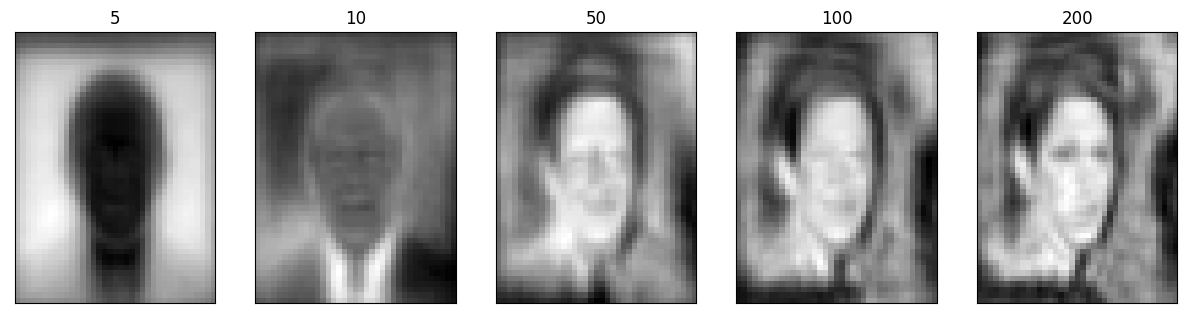

In [39]:
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=5) 

for i, nb in zip(range(5), [5, 10, 50, 100, 200]):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(str(nb))
    img = np.matmul(U_img[:, :nb], C_img.loc[2698][:nb])
    ax[i].imshow(img.reshape((hauteur_image, largeur_image)), 
                 cmap=plt.cm.gray)

plt.show()

## Quels axes sont importants pour une image donnée

**QUESTION** :  Regardez la qualité de la projection de cette image avec les nouveaux axes et trouvez les 12 axes les plus important pour cette image.

In [40]:
cos2_img.iloc[2698].sort_values(ascending=False).head(12)

2     0.099479
26    0.099324
9     0.092368
4     0.071390
20    0.049658
0     0.045791
15    0.038972
18    0.036704
6     0.024510
34    0.020612
27    0.013795
3     0.012680
Name: 2698, dtype: float32

**QUESTION** : Dessinez les eigenfaces correspondantes à ces 12 vecteurs.

on utilise le fait que l'on peut passer n'importe quelle ensemble de colonnes comme sélecteur

In [41]:
cols = cos2_img.iloc[2698].sort_values(ascending=False).head(12).index

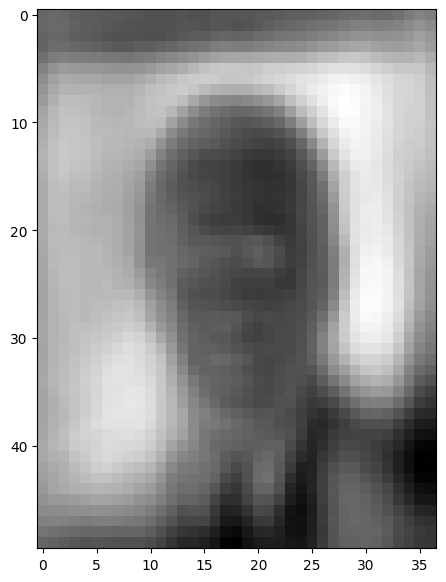

In [42]:
img = np.matmul(U_img[:, cols], C_img.loc[2698][cols])

fig, ax = plt.subplots(figsize=(7, 7)) 

ax.imshow(img.reshape((hauteur_image, largeur_image)), 
          cmap=plt.cm.gray)
plt.show()

le $cos^2$ :

In [43]:
sum(cos2_img.iloc[2698][cols])

0.6052840556949377

En prenant uniquement les 12 premiers axes, c'est un peu moins bien :

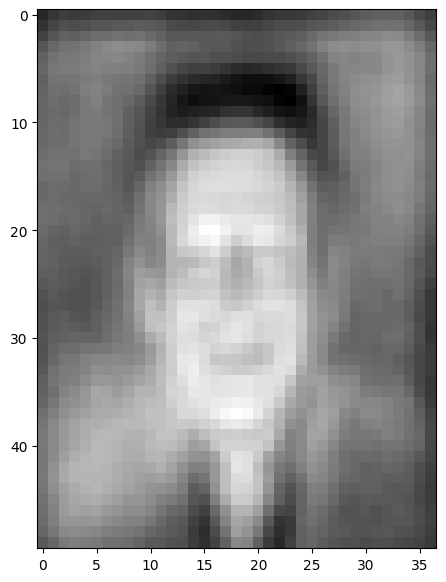

In [44]:
img = np.matmul(U_img[:, :12], C_img.loc[2698][:12])

fig, ax = plt.subplots(figsize=(7, 7)) 

ax.imshow(img.reshape((hauteur_image, largeur_image)), 
          cmap=plt.cm.gray)
plt.show()

le $cos^2$ :

In [45]:
sum(cos2_img.iloc[2698][:12])

0.36928713255156254